In [9]:
from typing import TypedDict,Literal
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd:float
    target_currency:Literal["inr","eur"]
    total:float

In [10]:
def calc_total(state: PortfolioState) -> PortfolioState:
        state["total_usd"] = state["amount_usd"] + 1.08
        return state

In [11]:
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 87.50
    return state

In [12]:
def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 0.9
    return state

In [16]:
def choose_conversion(state: PortfolioState) -> str:
    return state["target_currency"]

In [13]:
from langgraph.graph import StateGraph, START,END

In [14]:
builder=StateGraph(PortfolioState)

builder.add_node("Calculating Total USD",calc_total)

builder.add_node("Converting to INR",convert_to_inr)

builder.add_node("Converting to EUR",convert_to_eur)


In [17]:
builder.add_edge(START,"Calculating Total USD")

builder.add_conditional_edges(
    "Calculating Total USD",
    choose_conversion,
    {
        "inr": "Converting to INR",
        "eur": "Converting to EUR",
    }
)

builder.add_edge(["Converting to INR","Converting to EUR"],END)

In [18]:
graph=builder.compile()

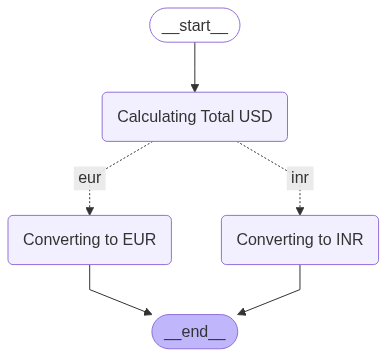

In [19]:
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
graph.invoke({"amount_usd": 1000,"target_currency":"eur"})

{'amount_usd': 1000,
 'total_usd': 1001.08,
 'target_currency': 'eur',
 'total': 900.9720000000001}